# Data and returns

In [1]:
# Install and import pandas_datareader
import pandas as pd
import numpy as np
# !pip install --upgrade pandas-datareader
from pandas_datareader import DataReader as pdr
# !pip install --upgrade yfinance
import yfinance as yf
pd.options.display.float_format = '{:.2f}'.format

## Stock prices

### Fetching data

In [2]:
# Pull stock information (no automatic adjustment for splits & dividends)
yf.download('AAPL', start='2000-01-01', end='2024-12-31', progress=False, auto_adjust=False)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2000-01-03,0.84,1.00,1.00,0.91,0.94,535796800
2000-01-04,0.77,0.92,0.99,0.90,0.97,512377600
2000-01-05,0.78,0.93,0.99,0.92,0.93,778321600
2000-01-06,0.72,0.85,0.96,0.85,0.95,767972800
2000-01-07,0.75,0.89,0.90,0.85,0.86,460734400
...,...,...,...,...,...,...
2024-12-23,255.27,255.27,255.65,253.45,254.77,40858800
2024-12-24,258.20,258.20,258.21,255.29,255.49,23234700


In [3]:
# Pull stock information
df = yf.download('AAPL', start='2000-01-01', end='2024-12-31', progress=False)
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2000-01-03,0.84,0.85,0.77,0.79,535796800
2000-01-04,0.77,0.83,0.76,0.82,512377600
2000-01-05,0.78,0.83,0.78,0.78,778321600
2000-01-06,0.72,0.81,0.72,0.80,767972800
2000-01-07,0.75,0.76,0.72,0.73,460734400
...,...,...,...,...,...
2024-12-23,255.27,255.65,253.45,254.77,40858800
2024-12-24,258.20,258.21,255.29,255.49,23234700


### Daily returns

In [4]:
pd.options.display.float_format = '{:.4f}'.format
ret = df['Close'].pct_change()
ret

Ticker,AAPL
Date,
2000-01-03,NaN
2000-01-04,-0.0843
2000-01-05,0.0146
2000-01-06,-0.0865
2000-01-07,0.0474
...,...
2024-12-23,0.0031
2024-12-24,0.0115
2024-12-26,0.0032


### Monthly returns

In [5]:
# Keep just the last close data point each month
df_monthly = df['Close'].resample('ME').last()
df_monthly

Ticker,AAPL
Date,
2000-01-31,0.7814
2000-02-29,0.8633
2000-03-31,1.0229
2000-04-30,0.9344
2000-05-31,0.6327
...,...
2024-08-31,228.7483
2024-09-30,232.7439
2024-10-31,225.6617


In [6]:
# Calculate a return
ret_monthly = df_monthly.pct_change()
ret_monthly

Ticker,AAPL
Date,
2000-01-31,NaN
2000-02-29,0.1048
2000-03-31,0.1848
2000-04-30,-0.0865
2000-05-31,-0.3229
...,...
2024-08-31,0.0324
2024-09-30,0.0175
2024-10-31,-0.0304


In [7]:
ret_monthly.columns

Index(['AAPL'], dtype='object', name='Ticker')

In [8]:
# Rename the column
ret_monthly.columns = ["ret"]
ret_monthly

,ret
Date,
2000-01-31,NaN
2000-02-29,0.1048
2000-03-31,0.1848
2000-04-30,-0.0865
2000-05-31,-0.3229
...,...
2024-08-31,0.0324
2024-09-30,0.0175
2024-10-31,-0.0304


In [9]:
# Summary statistics
print(f'Avg monthly return:\t {ret_monthly.ret.mean(): ,.4f}')
print(f'SD(monthly returns):\t {ret_monthly.ret.std(): ,.4f}')

# annualized summary stats
print('\nAnnualized stats:')
print(f'Avg return:\t {ret_monthly.ret.mean()*12: ,.4f}')
print(f'SD(return):\t {ret_monthly.ret.std()*np.sqrt(12): ,.4f}')

Avg monthly return:	  0.0260
SD(monthly returns):	  0.1106

Annualized stats:
Avg return:	  0.3121
SD(return):	  0.3832


### Cumulative returns

In [10]:
# Cumulative returns
cum_ret = (1+ret_monthly).cumprod()
cum_ret


,ret
Date,
2000-01-31,NaN
2000-02-29,1.1048
2000-03-31,1.3090
2000-04-30,1.1958
2000-05-31,0.8096
...,...
2024-08-31,292.7377
2024-09-30,297.8510
2024-10-31,288.7877


<Axes: xlabel='Date'>

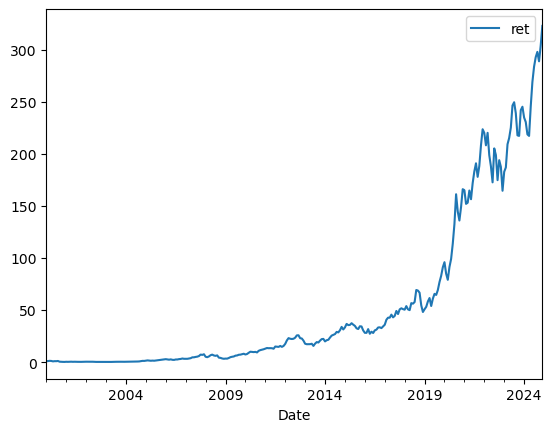

In [11]:
# Quick plot
cum_ret.plot()

In [12]:
# A prettier picture with hoverdata
import plotly.graph_objects as go
trace1 = go.Scatter(x=cum_ret.index.strftime('%Y-%m'), y=cum_ret['ret'], mode="lines")
fig = go.Figure()
fig.add_trace(trace1)
fig.update_layout(title='Cumulative Monthly Returns', xaxis_title='Date', yaxis_title='Cumulative Return')
fig.show()

In [13]:
# Alternatively, monthly returns can be calculated by compounding daily rets
df['ret']  = df['Close'].pct_change()+1
df['year'] = df.index.year
df['month']= df.index.month
df


Price,Close,High,Low,Open,Volume,ret,year,month
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2000-01-03,0.8431,0.8473,0.7659,0.7899,535796800,NaN,2000,1
2000-01-04,0.7720,0.8332,0.7621,0.8153,512377600,0.9157,2000,1
2000-01-05,0.7833,0.8327,0.7758,0.7814,778321600,1.0146,2000,1
2000-01-06,0.7155,0.8059,0.7155,0.7993,767972800,0.9135,2000,1
2000-01-07,0.7494,0.7607,0.7193,0.7268,460734400,1.0474,2000,1
...,...,...,...,...,...,...,...,...
2024-12-23,255.2700,255.6500,253.4500,254.7700,40858800,1.0031,2024,12
2024-12-24,258.2000,258.2100,255.2900,255.4900,23234700,1.0115,2024,12


In [14]:
mrets = df.groupby(['year','month'])['ret'].prod()-1
mrets = mrets.reset_index()
mrets

,year,month,ret
0,2000,1,-0.0731
1,2000,2,0.1048
2,2000,3,0.1848
3,2000,4,-0.0865
4,2000,5,-0.3229
...,...,...,...
295,2024,8,0.0324
296,2024,9,0.0175
297,2024,10,-0.0304
298,2024,11,0.0517


In [15]:
# Convert month and year columns to a pandas date
mrets['date'] = pd.to_datetime(mrets[['year', 'month']].assign(day=1)) + pd.offsets.MonthEnd(0)
mrets.index = mrets.date
mrets

,year,month,ret,date
date,,,,
2000-01-31,2000,1,-0.0731,2000-01-31
2000-02-29,2000,2,0.1048,2000-02-29
2000-03-31,2000,3,0.1848,2000-03-31
2000-04-30,2000,4,-0.0865,2000-04-30
2000-05-31,2000,5,-0.3229,2000-05-31
...,...,...,...,...
2024-08-31,2024,8,0.0324,2024-08-31
2024-09-30,2024,9,0.0175,2024-09-30
2024-10-31,2024,10,-0.0304,2024-10-31


In [16]:
# Combine two methods of monthly returns and check correlation
df_joined = pd.merge(mrets['ret'],ret_monthly,left_index=True,right_index=True)
df_joined.corr()
# df_joined

,ret_x,ret_y
ret_x,1.0000,1.0000
ret_y,1.0000,1.0000


## Economic data from FRED

In [17]:
# 10-year Treasury Yield from FRED
y10 = pdr("DGS10", "fred", start="1929-12-01")
y10

,DGS10
DATE,
1962-01-02,4.0600
1962-01-03,4.0300
1962-01-04,3.9900
1962-01-05,4.0200
1962-01-08,4.0300
...,...
2025-01-13,4.7900
2025-01-14,4.7800
2025-01-15,4.6600


<Axes: xlabel='DATE'>

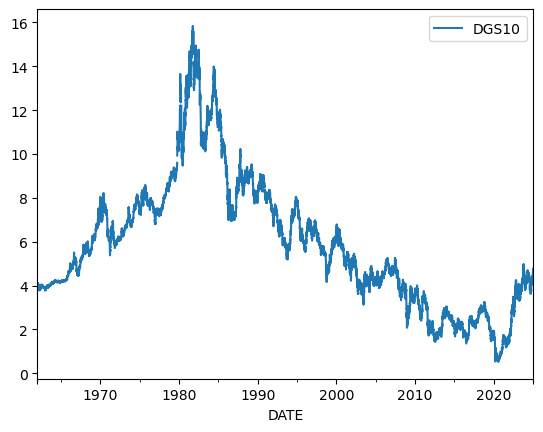

In [18]:
# A quick and dirty plot
y10.plot()

In [19]:
# A prettier picture with hoverdata
import plotly.graph_objects as go
trace1 = go.Scatter(
    x=y10.index, 
    y=y10.DGS10, 
    mode="lines",
    hovertemplate='Date: %{x: %Y-%m-%d}<br>Yield: %{y:.2f}%<extra></extra>'
)
fig = go.Figure()
fig.add_trace(trace1)
fig.show()

## Data on equity portfolios from Ken French Data Library
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [20]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [21]:
# Some factors
ff3 = pdr('F-F_Research_Data_Factors','famafrench', start=1900)[0]/100
# Clean-up missings
for c in ff3.columns:
    ff3[c] = np.where(ff3[c]==-99.99, np.nan, ff3[c])

# Some industry portfolios
ff48 = pdr("48_Industry_Portfolios", "famafrench", start=1900)[0]
# Clean-up missings
for c in ff48.columns:
    ff48[c] = np.where(ff48[c]==-99.99, np.nan, ff48[c])
ff48 = ff48/100

In [22]:
ff3

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,0.0296,-0.0256,-0.0243,0.0022
1926-08,0.0264,-0.0117,0.0382,0.0025
1926-09,0.0036,-0.0140,0.0013,0.0023
1926-10,-0.0324,-0.0009,0.0070,0.0032
1926-11,0.0253,-0.0010,-0.0051,0.0031
...,...,...,...,...
2024-07,0.0124,0.0680,0.0574,0.0045
2024-08,0.0161,-0.0355,-0.0113,0.0048
2024-09,0.0174,-0.0017,-0.0259,0.0040


In [23]:
# What does the following represent?
mrp = ff3['Mkt-RF'].mean()*12
print(f'The arithmetic average market risk premium (annualized): {mrp:.2%}')

The arithmetic average market risk premium (annualized): 8.28%


In [24]:
from scipy.stats import gmean

geomean = (gmean(1+ff3['Mkt-RF'])-1)*12
print(f'The geometric average market risk premium (annualized): {geomean:.2%}')

The geometric average market risk premium (annualized): 6.57%


In [25]:
ff48

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1926-07,0.0237,0.0012,NaN,-0.0519,0.0129,0.0865,0.0250,0.5021,-0.0048,0.0808,...,0.0770,0.0192,-0.2379,0.0007,0.0187,0.0461,-0.0054,0.0289,-0.0577,0.0520
1926-08,0.0223,0.0268,NaN,0.2703,0.0650,0.1681,-0.0076,0.4298,-0.0358,-0.0251,...,-0.0238,0.0485,0.0539,-0.0075,-0.0013,0.1183,0.0257,0.0530,0.0032,0.0676
1926-09,-0.0057,0.0158,NaN,0.0402,0.0126,0.0833,0.0642,-0.0491,0.0073,-0.0051,...,-0.0554,0.0008,-0.0787,0.0025,-0.0056,-0.0175,0.0072,-0.0306,-0.0481,-0.0386
1926-10,-0.0046,-0.0368,NaN,-0.0331,0.0106,-0.0140,-0.0509,0.0537,-0.0468,0.0012,...,-0.0508,-0.0262,-0.1538,-0.0220,-0.0411,-0.1182,-0.0428,-0.0574,-0.0094,-0.0849
1926-11,0.0675,0.0626,NaN,0.0729,0.0455,0.0000,0.0182,-0.0640,-0.0054,0.0187,...,0.0384,0.0161,0.0467,0.0652,0.0433,-0.0297,0.0358,0.0221,0.0513,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07,0.0511,0.0406,0.0357,0.0304,0.1169,0.0851,-0.0396,0.0315,-0.0107,-0.0236,...,0.1179,0.0020,0.0644,-0.0013,-0.0266,0.0746,0.0844,0.1938,0.0673,0.0590
2024-08,0.0232,0.0509,0.0538,0.0088,0.0796,-0.0192,0.0598,0.0169,0.0630,0.0578,...,0.0124,0.0245,-0.0121,0.0075,0.0547,0.0220,0.0433,0.0056,0.0098,0.0627
2024-09,0.0276,0.0095,0.0077,0.0132,-0.0131,0.0337,0.0429,-0.0233,0.0105,0.0576,...,0.0327,0.0250,-0.0072,0.0409,0.0543,-0.0200,-0.0102,0.0599,0.0261,-0.0135


## Our own function to pull monthly returns data

In [26]:
# Function to fetch a yahoo time-series
def returns(ticker):
    ret = yf.download(ticker, start='2000-01-01', end='2024-12-31', progress=False)
    ret = ret["Close"].resample("ME").last()
    ret = ret.pct_change()
    ret.columns = [ticker]
    return ret
aapl = returns('AAPL')
ibm = returns('IBM')

In [27]:
ibm.tail(10)

,IBM
Date,
2024-03-31,0.0320
2024-04-30,-0.1297
2024-05-31,0.0139
2024-06-30,0.0366
2024-07-31,0.1110
2024-08-31,0.0612
2024-09-30,0.0938
2024-10-31,-0.0650
2024-11-30,0.1088
